In [40]:
import numpy as np
import pandas as pd
import nltk
import itertools

In [41]:
data = pd.read_csv('job_skills.csv')
data.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [42]:
data = data.rename(columns = {'Minimum Qualifications':'Minimum', 'Preferred Qualifications':'Preferred'})
data.head()

,Company,Title,Category,Location,Responsibilities,Minimum,Preferred
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [43]:
data = data.dropna(how='any',axis='rows')

In [44]:
data.Category.value_counts()

Sales & Account Management          168
Marketing & Communications          165
Finance                             115
Technical Solutions                 100
Business Strategy                    98
People Operations                    86
User Experience & Design             84
Program Management                   72
Partnerships                         59
Product & Customer Support           50
Legal & Government Relations         46
Administrative                       40
Sales Operations                     31
Real Estate & Workplace Services     25
Software Engineering                 24
Hardware Engineering                 22
Manufacturing & Supply Chain         16
Technical Infrastructure             11
Network Engineering                   6
IT & Data Management                  5
Developer Relations                   5
Technical Writing                     5
Data Center & Network                 2
Name: Category, dtype: int64

In [45]:
data.columns

Index(['Company', 'Title', 'Category', 'Location', 'Responsibilities',
       'Minimum', 'Preferred'],
      dtype='object')

In [46]:
sam_r = data[data.Category=='Sales & Account Management']['Responsibilities']
mc_r = data[data.Category=='Marketing & Communications']['Responsibilities']
f_r = data[data.Category=='Finance']['Responsibilities']
ts_r = data[data.Category=='Technical Solutions']['Responsibilities']
bs_r = data[data.Category=='Business Strategy']['Responsibilities']

In [47]:
type(sam_r)

pandas.core.series.Series

In [48]:
len(sam_r)

168

In [49]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [50]:
def get_verbs(series):
    series = [nltk.pos_tag(nltk.word_tokenize(item)) for item in list(series)]
    series = [[word[0].lower() for word in item if word[1] in ['VB', 'VBD', 'VBG', 'VBP', 'VBZ']] for item in series]
    return ' '.join(list(itertools.chain.from_iterable(series)))

In [51]:
get_verbs(sam_r)

'develop expedite improve commercialize product including understanding translating execute meet support enablement reporting developing applying improve manage planning presenting reporting increase develop serve optimize package serve regarding working providing formulating asks deliver develop mentor providing facilitating ensure are ensuring are are provide tracking encourage develop ensuring are search develop help drive support deliver overarching focused selling delivering including develop drive s become build grow lasting growing coordinate drive deliver working drive collaborating apply drive enable lead unlock storytelling enabling elevate execute working deliver trusted develop add grow improve develop drive provide develop keep provide build google engineering provide improve maintain regarding support marketing growing ’ take serve top enhance leading shifting maintain generating developing working maximize open forecast achieve leading ensure working serve trusted develo

In [52]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
def create_wordcloud(title,text,image_route):
    G = np.array(Image.open(image_route))
    text = get_verbs(text)
    sns.set(rc={'figure.figsize':(15,10)})
    wordcloud = WordCloud(mask=G,background_color="white",max_words=200,max_font_size=400).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.title(title,size=16)
    plt.show()

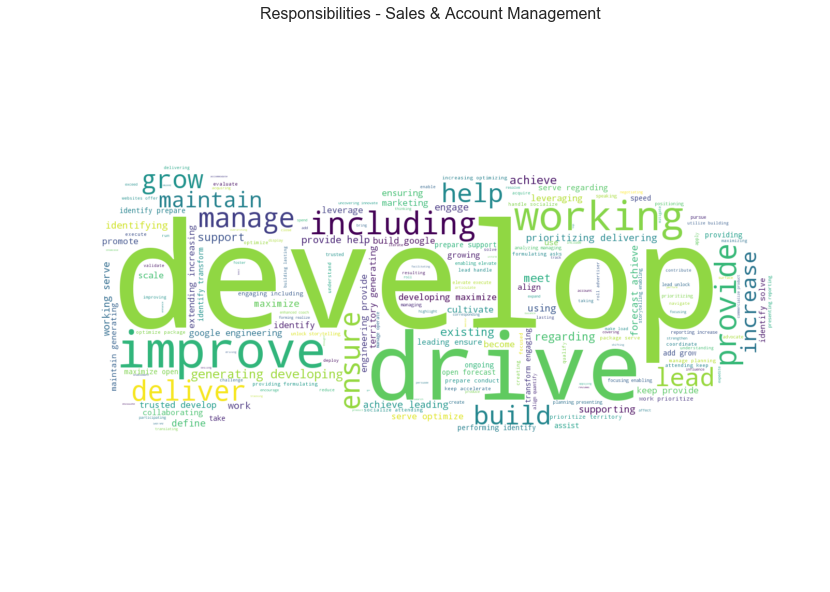

In [54]:
create_wordcloud('Responsibilities - Sales & Account Management', sam_r, 'simple-fish copy.jpg')

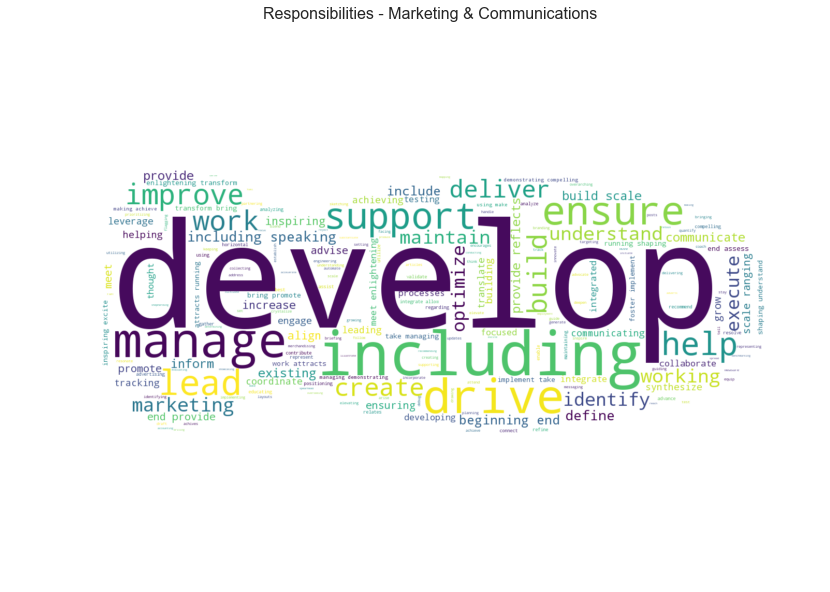

In [55]:
create_wordcloud('Responsibilities - Marketing & Communications', mc_r, 'simple-fish copy.jpg')

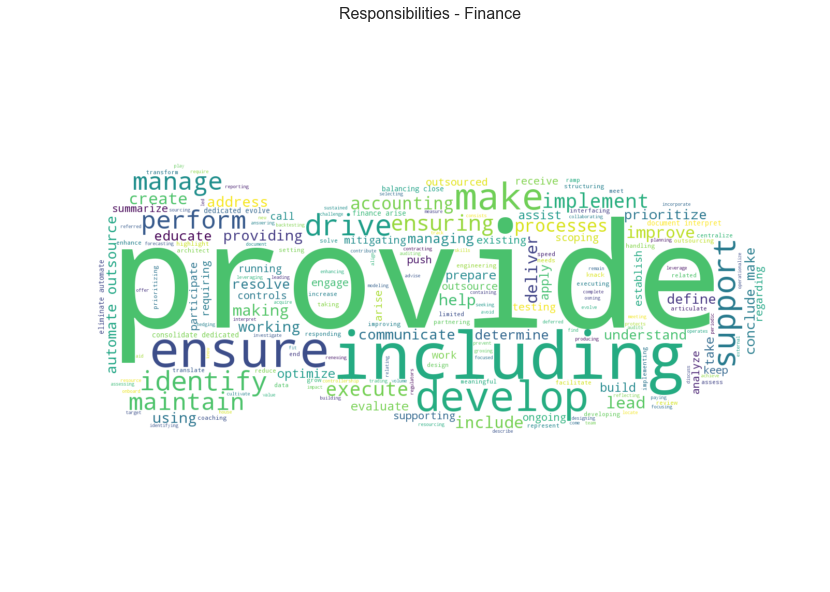

In [56]:
create_wordcloud('Responsibilities - Finance', f_r, 'simple-fish copy.jpg')

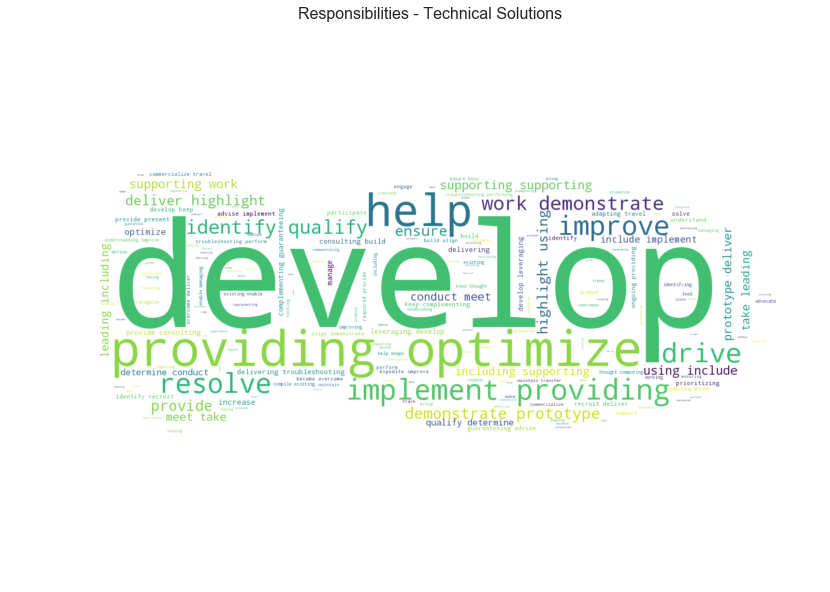

In [57]:
create_wordcloud('Responsibilities - Technical Solutions', ts_r, 'simple-fish copy.jpg')

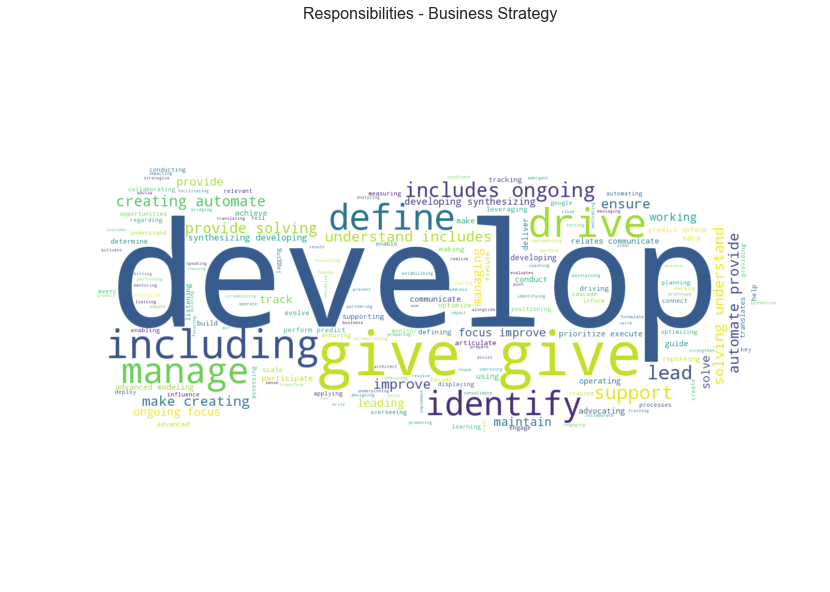

In [58]:
create_wordcloud('Responsibilities - Business Strategy', bs_r, 'simple-fish copy.jpg')